# OUT_IQR

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [6]:
df.shape

(1000, 3)

In [7]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


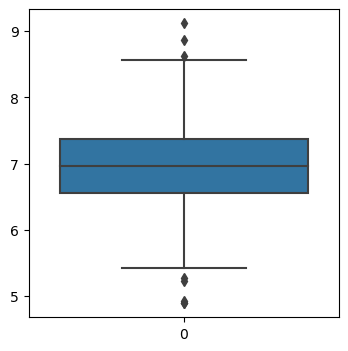

In [3]:
plt.figure(figsize=(4,4))
sns.boxplot(df['cgpa'])
plt.show()

C:\Users\blde2\AppData\Local\Temp\ipykernel_8944\3015581030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


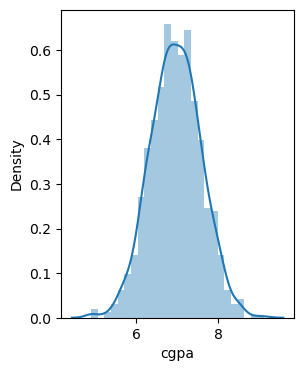

In [5]:
plt.figure(figsize=(3,4))
sns.distplot(df['cgpa'])
plt.show()

In [8]:
Q1=df['cgpa'].quantile(0.25)
Q3=df['cgpa'].quantile(0.75)
iqr=Q3-Q1

In [9]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

In [10]:
#findind
df[(df['cgpa'] >upper_limit) | (df['cgpa'] < lower_limit)]

,cgpa,placement_exam_marks,placed
278,5.23,17.0,1
485,4.92,44.0,1
815,5.27,43.0,0
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


In [19]:
df[(df['cgpa'] <upper_limit) & (df['cgpa'] > lower_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
990,6.17,33.0,1
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


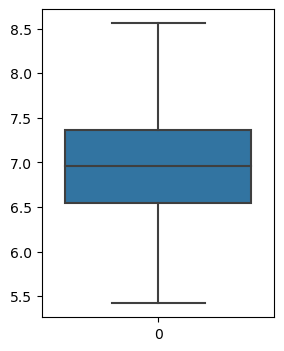

In [13]:
new_df=df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]
#new_df
plt.figure(figsize=(3,4))
sns.boxplot(new_df['cgpa'])
plt.show()

In [14]:
df['cgpa']=np.where(
df['cgpa']>upper_limit,
upper_limit,
np.where(df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
        ))
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.60,44.0,1
996,8.60,65.0,1
997,5.32,34.0,0
998,8.60,46.0,1


In [15]:
df['cgpa'][278]

5.319999999999999

In [16]:
df['cgpa'][995]

8.600000000000001

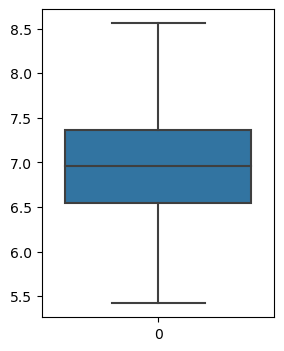

In [17]:
plt.figure(figsize=(3,4))
sns.boxplot(new_df['cgpa'])
plt.show()